In [83]:
import pandas as pd
import numpy as np

numNames = open("../db/names.csv", "r").read().split("\n").__len__()
def get_opt_k(m: int) -> int:
    return np.round(np.log(2)*m/numNames, 0).__int__()

def get_false_positive_rate(m: int, k: int) -> float:
    return (1 - np.exp(-(k*numNames)/m))**k


for M in [numNames*i for i in range(1, 14, 2)]:
    k = get_opt_k(M)
    fp_rate = get_false_positive_rate(M, k)
    print(f"Probabilidad falso positivo, {M=:9,}, {k=:2}: {fp_rate*100:6.3f}%")

Probabilidad falso positivo, M=   93,889, k= 1: 63.212%
Probabilidad falso positivo, M=  281,667, k= 2: 23.676%
Probabilidad falso positivo, M=  469,445, k= 3:  9.185%
Probabilidad falso positivo, M=  657,223, k= 5:  3.466%
Probabilidad falso positivo, M=  845,001, k= 6:  1.327%
Probabilidad falso positivo, M=1,032,779, k= 8:  0.509%
Probabilidad falso positivo, M=1,220,557, k= 9:  0.194%


In [67]:
import pandas as pd

def get_fp_rate_df(df: pd.DataFrame, M: int, k: int) -> float:
    df = df[df["M"]  == M]
    df = df[df["k"]  == k]
    df = df[df["DB"] == "BloomFilter"]

    fp = 0      # FP
    total = 0   # FP + TN   
    for found, found_in_filter, N, p in zip(df["found"], df["foundInFilter"], df["N"], df["p"]):
        fp += (found_in_filter - found) / N   # Aporte de cada test
        total += (1-p)
    
    fp_rate = fp / total
    return fp_rate * 100

df = pd.read_csv("results.csv")


for M in [100_000]:
    k = get_opt_k(M)
    print(f"Proporción de falsos positivos, {M=:9,}, {k=}: {get_fp_rate_df(df, M, k):6.3f}%")


Proporción de falsos positivos, M=  100,000, k=1: 60.589%


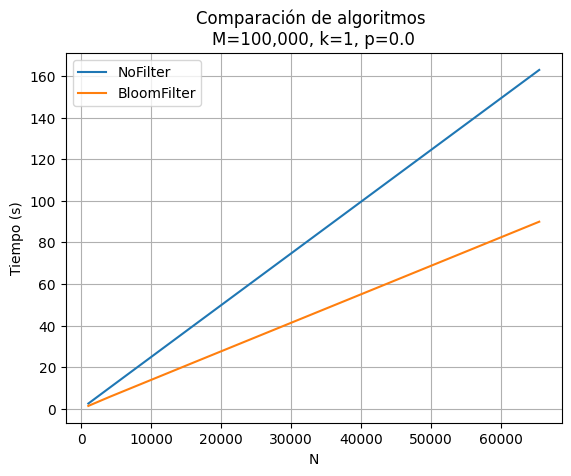

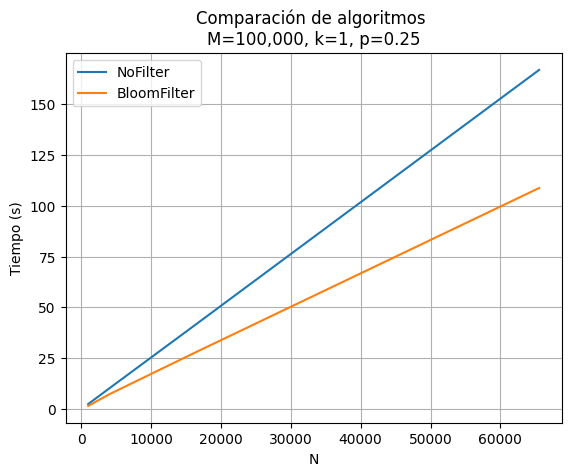

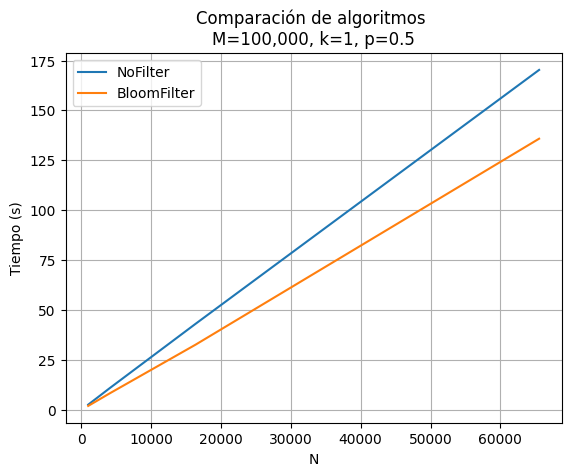

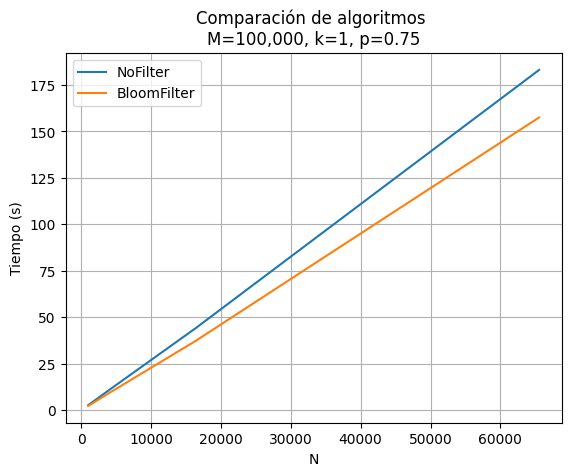

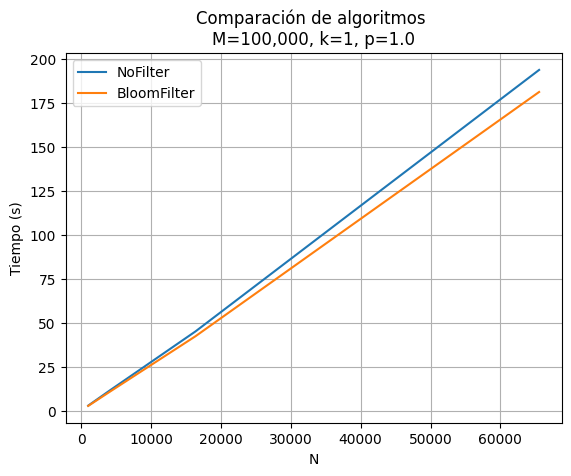

In [70]:
import matplotlib.pyplot as plt

def cmp_graph(M: int, k: int, p: float) -> None:
    df = pd.read_csv("results.csv")
    df = df[df["M"] == M]
    df = df[df["k"] == k]
    df = df[df["p"] == p]

    fig, ax = plt.subplots()
    ax.set_title(f"Comparación de algoritmos \n{M=:,}, {k=}, {p=}")
    ax.set_xlabel("N")
    ax.set_ylabel("Tiempo (s)")

    for db in df["DB"].unique():
        db_df = df[df["DB"] == db]
        ax.plot(db_df["N"], db_df["Time"], label=db)

    ax.legend()
    ax.grid()
    plt.show()

cmp_graph(100_000, 1, 0.0)
cmp_graph(100_000, 1, 0.25)
cmp_graph(100_000, 1, 0.5)
cmp_graph(100_000, 1, 0.75)
cmp_graph(100_000, 1, 1.0)

